## 1.텍스트 파일과 엑셀 파일 읽기

In [8]:
import pandas as pd

CCTV_Seoul = pd.read_csv("./CCTV_in_Seoul.csv", encoding = "cp949")
CCTV_Seoul.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,계,83557,4812,1851.0,3434.0,4295,6840,8708,11572,10627,12267,11247,7904
1,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
2,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
3,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
4,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283


In [9]:
#column명 확인
CCTV_Seoul.columns

Index(['구분', '총계', '2012년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [10]:
#cctv 현황 정제
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별"}, inplace = True)
CCTV_Seoul.drop([0], inplace = True)
CCTV_Seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
2,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
3,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
4,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
5,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [11]:
#인구 파일 불러오기
pop_Seoul = pd.read_excel("./population_in_Seoul.xls")
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [12]:
#인구 파일 수정
pop_Seoul = pd.read_excel("./population_in_Seoul.xls", header=2, usecols="B, D, G, J, N")
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
#인구 파일 열 이름 수정
pop_Seoul.rename(columns={pop_Seoul.columns[0] : "구별", pop_Seoul.columns[1] : "인구수", pop_Seoul.columns[2] : "한국인",
                         pop_Seoul.columns[3] : "외국인", pop_Seoul.columns[4] : "고령자"}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


## 2. Pandas 이용하여 CCTV와 인구 현황 데이터 파악하기
### 2.1 CCTV 현황 

In [14]:
#CCTV 전체 개수로 정렬
CCTV_Seoul.sort_values(by="총계", ascending=True).head(5)

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
1,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
10,도봉구,1930,128,22.0,2.0,145,172,123,129,222,210,184,593
20,동작구,2306,41,24.0,25.0,503,128,253,271,300,322,419,20
18,금천구,2411,0,0.0,174.0,80,361,133,196,539,367,513,48
2,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403


CCTV 개수가 가장 적은 구는 종로구, 도봉구, 동작구, 금천구, 중구 순임을 알 수 있다.

In [15]:
CCTV_Seoul.sort_values(by="총계", ascending=False).head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
23,강남구,6871,69,67.0,66.0,580,830,1293,988,745,791,926,516
21,관악구,5149,440,84.0,431.0,439,609,622,688,674,595,331,236
17,구로구,4608,852,216.0,349.0,187,268,326,540,488,434,415,533
8,성북구,4602,81,78.0,170.0,229,322,594,890,867,714,253,404
12,은평구,4131,14,3.0,44.0,332,329,555,403,635,1057,288,471


반대로 CCTV 개수가 많은 구는 강남구, 관악구, 구로구, 성북구 순임을 알 수 있다.

In [16]:
#CCTV 증가율 계산
CCTV_Seoul.fillna(0, inplace = True)
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2021년'].astype(int) + CCTV_Seoul['2020년'].astype(int) +
                       CCTV_Seoul['2019년'].astype(int)) / (CCTV_Seoul['2018년'].astype(int) 
                    + CCTV_Seoul['2017년'].astype(int) + CCTV_Seoul['2016년'].astype(int))* 100

CCTV_Seoul.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
1,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,60.404624
2,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403,92.084168
3,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,148.837209
4,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283,76.053757
5,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655,129.362416


### 2.2 인구 현황

In [17]:
#인구수 총합 삭제

pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [18]:
#구별 반복된 데이터 있는지 확인
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [19]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [20]:
#결측치 삭제
pop_Seoul.drop([26], inplace = True)

In [21]:
#외국인 비율과 고령자 비율 계산
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [22]:
pop_Seoul.sort_values(by="인구수", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


총 인구수는 송파구, 강서구, 강남구, 노원구, 관악구 순으로 많은 것을 알 수 있다.

In [23]:
pop_Seoul.sort_values(by="외국인", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [24]:
pop_Seoul.sort_values(by="외국인비율", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


외국인수는 영등포구, 구로구, 금천구, 관악구, 동대문구 순으로 많은 것을 알 수 있다.<br>
외국인 비율의 경우 영등포구, 금천구, 구로구, 중구, 용산구 순으로 많은 것을 보아 숫자와 비율 상의 차이가 있음을 알 수 있다.

In [25]:
pop_Seoul.sort_values(by="고령자", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [26]:
pop_Seoul.sort_values(by="고령자비율", ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


고령자수는 강서구, 송파구, 은평구, 노원구, 관악구 순으로 많고, 비율은 강북구, 종로구, 중구, 용산구, 서대문구 순으로 많다.

## 3. 데이터프레임 병합 및 분석
### 3.1 데이터프레임 병합

In [27]:
resultData = pd.merge(CCTV_Seoul, pop_Seoul, on = "구별")
resultData.head()

,구별,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0,60.404624,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228,148.837209,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283,76.053757,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655,129.362416,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,2628,4,0.0,14.0,16,115,804,814,201,218,223,219,36.283672,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [28]:
#필요한 데이터만 선별
resultData = resultData[['구별', '총계', '최근증가율', '인구수', '한국인', '외국인', '고령자', '외국인비율',
              '고령자비율']]
resultData.head()

,구별,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1715,60.404624,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
1,용산구,2611,148.837209,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
2,성동구,3829,76.053757,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
3,광진구,3211,129.362416,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
4,동대문구,2628,36.283672,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [29]:
#인덱스를 구별로 설정

resultData.set_index("구별", inplace = True)
resultData.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1715,60.404624,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
용산구,2611,148.837209,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
성동구,3829,76.053757,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
광진구,3211,129.362416,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
동대문구,2628,36.283672,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


### 3.2 상관분석

In [31]:
import numpy as np

np.corrcoef(resultData['고령자비율'], resultData['총계'])

array([[ 1.        , -0.35138083],
       [-0.35138083,  1.        ]])

In [32]:
np.corrcoef(resultData['외국인비율'], resultData['총계'])

array([[ 1.        , -0.08486633],
       [-0.08486633,  1.        ]])

In [33]:
np.corrcoef(resultData['인구수'], resultData['총계'])

array([[1.        , 0.43888199],
       [0.43888199, 1.        ]])

고령자비율과 총계 사이 상관계수는 0.3인 것을 보아 두 변수 사이 상관관계는 약하고 </br>
외국인비율과 총계 사이 상관계수가 0.08인 것을 보아 두 변수 간 상관관계는 없다는 것을 알 수 있다. </br>
인구수와 총계 사이 상관계수 또한 0.4인 것을 보아 두 변수 사이 상관관계가 약하다.

## 4. 데이터 시각화
### 4.1. 시각화할 데이터

In [36]:
resultData.sort_values(by="총계", ascending = False).head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,6871,73.793787,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
관악구,5149,58.568548,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
구로구,4608,102.067947,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
성북구,4602,58.315610,461260.0,449773.0,11487.0,64692.0,2.490353,14.025062
은평구,4131,113.998745,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019


In [35]:
resultData.sort_values(by="인구수", ascending=False).head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,2897,151.461378,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,2744,121.114684,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,6871,73.793787,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,2492,128.531856,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,5149,58.568548,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 4.2. 시각화-Matplotlib

In [40]:
#matplotplib 폰트지정

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

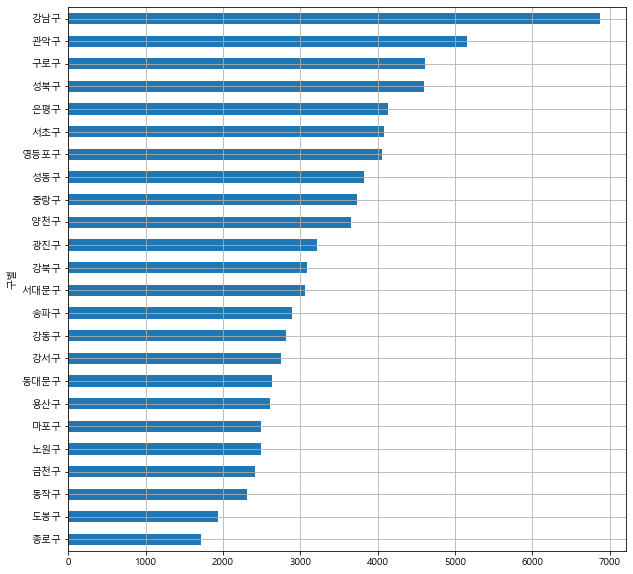

In [43]:
resultData['총계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

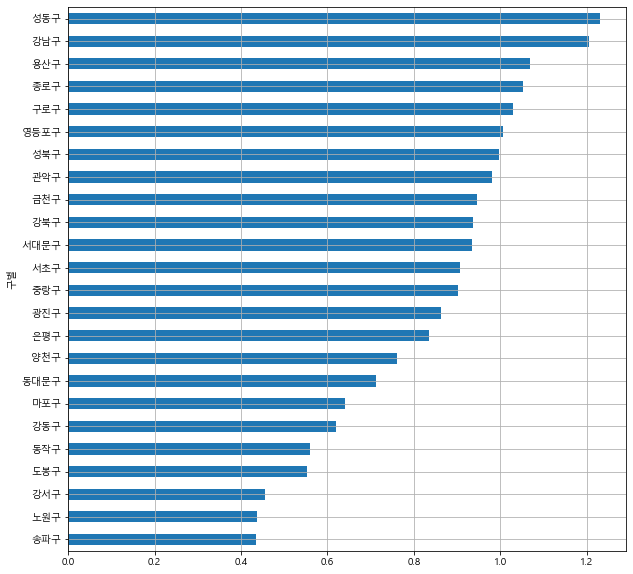

In [44]:
resultData['CCTV비율'] = resultData['총계'] / resultData['인구수'] * 100
resultData['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

CCTV개수는 강남구가 월등하게 높지만, 인구수 대비 CCTV개수 비율을 보았을 때는 성동구와 강남구가 월등히 높은 것을 알 수 있다.</br>
종로구의 경우, CCTV개수는 가장 적지만 인구수 대비 CCTV개수 비율은 4번째로 가장 많다.

In [50]:
fp1 = np.polyfit(resultData['인구수'], resultData['총계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(10000, 700000, 100)

resultData['오차'] = np.abs(resultData['총계'] - f1(resultData['인구수']))
df_sort = resultData.sort_values(by="오차", ascending = False)
df_sort.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,73.793787,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1.204382,2846.074000
송파구,2897,151.461378,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.434019,1541.995776
노원구,2492,128.531856,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883,0.437666,1528.161228
강서구,2744,121.114684,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.454476,1422.981098
관악구,5149,58.568548,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.979801,1316.137856


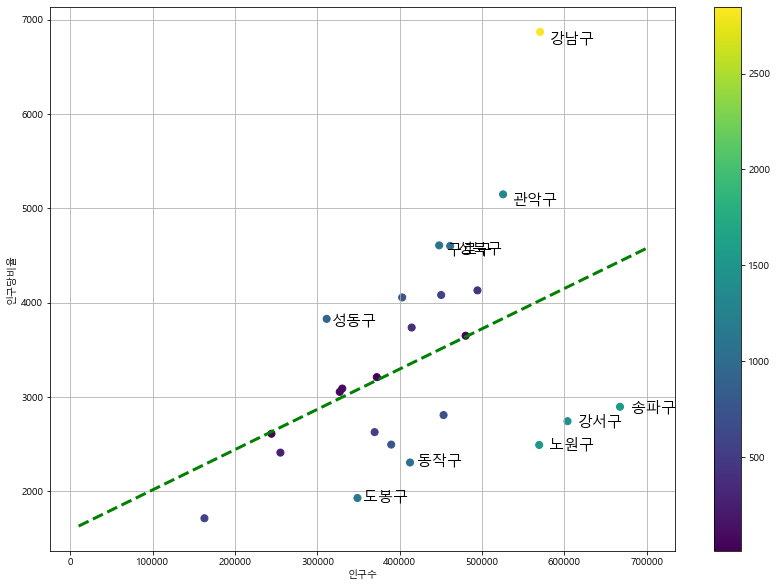

In [52]:
plt.figure(figsize=(14,10))
plt.scatter(resultData['인구수'], resultData['총계'], c=resultData['오차'], s =50)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['총계'][n]*0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

인구수 대비 CCTV가 월등히 많이 설치된 지역은 강남구, 관악구, 성북구이고, 인구수 대비 CCTV 개수가 부족한 지역은 송파구, 강서구, 노원구,동작구, 도봉구이다. 